# Packages


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from tensorflow.keras.layers import Dense, Dropout, Flatten # core layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define custom callback to extract activation values
class ActivationCallback(Callback):
    def __init__(self):
        super().__init__()
        self.activations = []
        self.labels = []
    
    def on_epoch_end(self, epoch, logs=None):
        layer_outputs = [layer.output for layer in self.model.layers]
        activation_model = tf.keras.models.Model(inputs=self.model.input, outputs=layer_outputs)
        activations = activation_model.predict(x_train)
        #self.activations.append(activations[1][:, 26])
        self.activations.append(activations)
        self.labels.append(y_train.argmax(axis=1))        

## Load MNIST Dataset


In [12]:
#(x_train, y_train), (x_test, y_test) = mnist.load_data()# Load the MNIST dataset
path = '/Users/antoniosquicciarini/ownCloud/PhD_Projects/Information_Measurement/Data_and_Models/mnist.npz'
(x_train, y_train), (x_test, y_test) = mnist.load_data(path=path)
print(f"Training data size is {x_train.shape}\nTesting data size is {x_test.shape}")

Training data size is (60000, 28, 28)
Testing data size is (10000, 28, 28)


## Data Preprocessing

In [23]:
# Preprocess the data
# x_train = x_train.reshape(x_train.shape[0], 28 * 28).astype('float32') / 255.0 
# x_test = x_test.reshape(x_test.shape[0], 28 * 28).astype('float32') / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [24]:
x_test[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [ ]:
# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(28 * 28,)),

    #Dense(512, activation='relu', input_shape=(28 * 28,)),
    #Dropout(0.2),
    #Dense(512, activation='relu'),
    #Dropout(0.2),
    
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the activation callback
activation_cb = ActivationCallback()

# Train the model with the activation callback
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test), callbacks=[activation_cb])

# Get the activation values
activations = activation_cb.activations
labels = activation_cb.labels

label=0  N_Non0_Data=3491
label=1  N_Non0_Data=1630
label=2  N_Non0_Data=4321
label=3  N_Non0_Data=430
label=4  N_Non0_Data=5820
label=5  N_Non0_Data=83
label=6  N_Non0_Data=684
label=7  N_Non0_Data=6252
label=8  N_Non0_Data=199
label=9  N_Non0_Data=5672


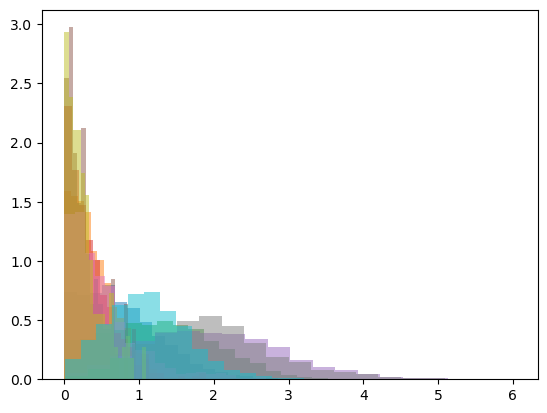

In [79]:
for i in range(10):
    data = labels[0]==i
    activat = np.extract(data, activations[9])
    activat = np.extract(activat, activat)
    print("label=" + str(i) + "  N_Non0_Data=" + str(len(activat)))
    plt.hist(activat, 20, density=True,
         histtype ='bar', alpha = 0.5)
  
# El dropout reduce la diferencia entre las distribuciones de las activaciones

label=0  N_Non0_Data=3979
label=1  N_Non0_Data=5293
label=2  N_Non0_Data=4668
label=3  N_Non0_Data=2707
label=4  N_Non0_Data=5840
label=5  N_Non0_Data=710
label=6  N_Non0_Data=4342
label=7  N_Non0_Data=6259
label=8  N_Non0_Data=897
label=9  N_Non0_Data=5910


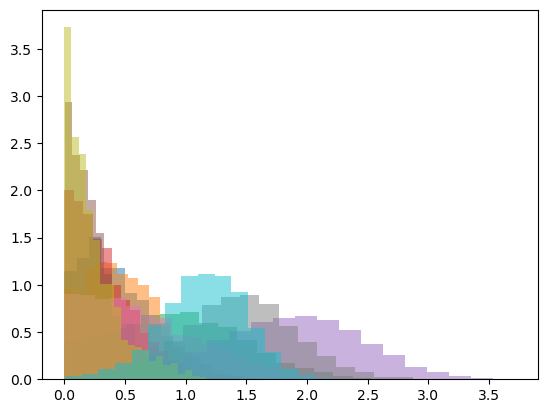

In [80]:
for i in range(10):
    data = labels[0]==i
    activat = np.extract(data, activations[1])
    activat = np.extract(activat, activat)
    print("label=" + str(i) + "  N_Non0_Data=" + str(len(activat)))
    plt.hist(activat, 20, density=True,
         histtype ='bar', alpha = 0.5)

In [ ]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [ ]:
Y_train

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)